In [1]:
from IPython.display import Image
Image("D:/datachamps/images/logorectangular.png")

# Construcción de Tuberías de Flujos Trabajo desde Cero

## Introducción

**Flujos de Trabajo.** Usualmente el término *Flujo de Trabajo* o *Workflow* quiere decir un proceso o una serie de pasos en un proyecto de analisis de datos y ML. Existen diversos Procesos de Ciencia de Datos, pero por ahora consideraremos uno sencillos qu econstará de los siguientes 4 pasos:

1. Importar Datos
2. Preparar los Datos
3. Construcción del Modelo
4. Despliegue de Resultados

**Tubería.** Cuando nos referimos a una tubería estamos hablando de la capacidad para incorporar conjuntamente la funcionalidad del flujo de trabajo.


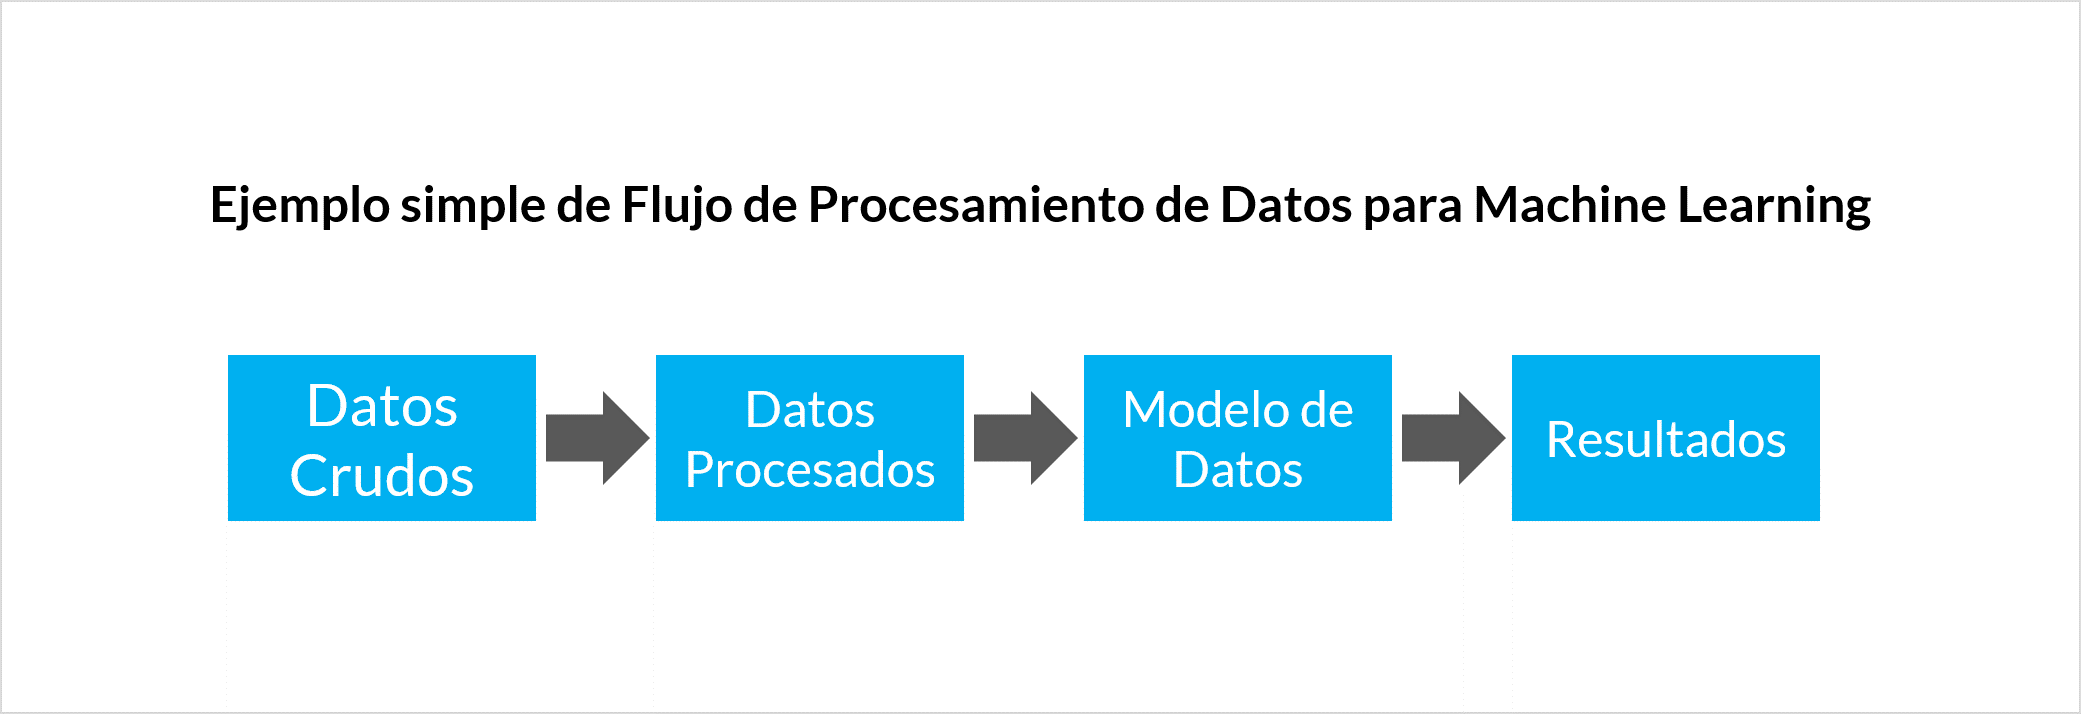

In [3]:
from IPython.display import Image
Image("D:/datachamps/images/WorkflowExample.png")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Los datos:

In [31]:
PATH = 'D:/datachamps/data/iris.csv'
data = pd.read_csv(PATH)

# Exploración de los datos:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [32]:
round(data.describe(),2)

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


<Figure size 720x720 with 0 Axes>

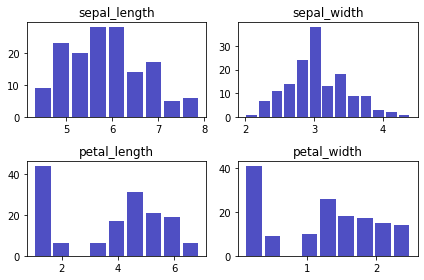

In [33]:
plt.figure(figsize=[10,10])
f,a = plt.subplots(2,2)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(data.iloc[:,idx], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
    ax.set_title(data.columns[idx])
plt.tight_layout()

## A. Flujo de Trabajo: Importación y Preparación de los Datos (dataset.py)

Consideraremos la elaboración de un script que involucra varias funciones de importación y preparación de datos. 

### 1. Función para Cargado de Datos:

In [34]:
#import pandas as pd

def load_dataset(filename, filetype='csv', header=True):

    '''
    Loads a dataset from file
    
    Parameters:
    -----------
    filename: str
        Name of data file
    filetype: str
        The type of data file (csv, tsv)
    Returns:
    --------
    DataFrame
        Dataset as pandas DataFrame
    '''

    in_file = open(filename)
    data = []
    header_row = ''

    # Read the file line by line into instance structure
    for line in in_file.readlines():

        # Skip comments
        if not line.startswith("#"):
            
            # TSV file
            if filetype == 'tsv':
                if header:
                    header_row = line.strip().split('\t')
                else:
                    raw = line.strip().split('\t')
                    
            # CSV file
            elif filetype =='csv':
                if header:
                    header_row = line.strip().split(',')
                else:
                    raw = line.strip().split(',')
            
            # Neither = problem
            else:
                print('Invalid file type')
                exit()

            # Append to dataset appropriately
            if not header:
                data.append(raw)
            header = False
    
    # Build a new dataframe of the data instance list of lists and return
    df = pd.DataFrame(data, columns=header_row)
    return df

#File "<ipython-input-5-42504f438a91>", line 46
#    print 'Invalid file type'
#                            ^
#SyntaxError: Missing parentheses in call to 'print'. Did you mean print('Invalid file type')?


### 2. Función para Convertir a Valores Numéricos:

In [35]:
def to_numeric(dataset, attr_name):
    
    '''
    Performs a simple categorical to numeric attribute value transformation
    
    Parameters:
    -----------
    dataset: DataFrame
        Dataset on which to perform transformation
    attr_name: str
        Dataset attribute name to convert from nominal to numeric values
    Returns:
    --------
    DataFrame
        DataFrame with data transformation performed
    dict
        Python dictionary of attribute name to integer mappings
    '''
    
    # Get unique entries in column
    unique_vals = dataset[attr_name].unique()
    
    # Create dict
    val_dict = {}
    for val in unique_vals:
        if not val in val_dict:
            val_dict[val] = len(val_dict)
    
    # Replace values in attr_name col as per dict
    dataset[attr_name].replace(val_dict, inplace=True)
    
    # Return dataset and value dictionary
    return dataset, val_dict

### 3. Función para Transformar a Representación Matricial

In [36]:
#import numpy as np

def to_matrix(dataset):
    
    '''
    Converts a pandas DataFrame dataset to a numpy matrix representation
    
    Parameters:
    -----------
    dataset: DataFrame
        Dataset to convert to matrix representation
    Returns:
    --------
    ndarray
        numpy ndarray representation of dataset
    '''
    
    return dataset.as_matrix()

### 4. Transformación a Formato Numérico

Con este paso adicional nos vamos a asegurar de que los valores numéricos de hecho lo son. Como elos datos fueron alojados en un archivo csv la última vez, aún los valores numéricos fueron alojados como 'strings'.

In [37]:
def from_str(dataset, attrs):
    
    '''
    Performs numeric values stored as strings to numeric value transformation
    
    Parameters:
    -----------
    dataset: DataFrame
        Dataset on which to perform transformation
    attr_name: str / list
        Dataset attribute name(s) to convert from strings to equivalent numeric values
    Returns:
    --------
    DataFrame
        DataFrame with data transformation performed
    '''

    # Make conversions on list of attributes
    if type(attrs) == list:
        for attr_name in attrs:
            dataset[attr_name] = dataset[attr_name].astype(float)

    # Make conversion on single attribute
    else:
        data[attrs] = data[attrs].astype(float)
    
    # Return dataset after conversion
    return dataset

## Prueba del Flujo de Trabajo

Cada etapa es ejecutada manualmente en el prompt...

In [38]:
# 1. Aplicar Función de Cargado de Datos
data = load_dataset(PATH)

# Verificación: 
type(data)

pandas.core.frame.DataFrame

In [39]:
# 2. Aplicación de Función de Transformación de Valores Numéricos
data, data_dict = to_numeric(data, 'species')

# Verificación:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5,3.6,1.4,0.2,0


In [40]:
data_dict

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [41]:
# 3. Aplicación de Función de transformación de Datos:
ds = to_matrix(data)

#print 
ds[:10]

D:\Archivos de Programas Externo\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


array([['5.1', '3.5', '1.4', '0.2', 0],
       ['4.9', '3', '1.4', '0.2', 0],
       ['4.7', '3.2', '1.3', '0.2', 0],
       ['4.6', '3.1', '1.5', '0.2', 0],
       ['5', '3.6', '1.4', '0.2', 0],
       ['5.4', '3.9', '1.7', '0.4', 0],
       ['4.6', '3.4', '1.4', '0.3', 0],
       ['5', '3.4', '1.5', '0.2', 0],
       ['4.4', '2.9', '1.4', '0.2', 0],
       ['4.9', '3.1', '1.5', '0.1', 0]], dtype=object)

In [42]:
# https://www.kdnuggets.com/2017/05/machine-learning-workflows-python-scratch-part-1.html
data.dtypes

sepal_length    object
sepal_width     object
petal_length    object
petal_width     object
species          int64
dtype: object

### Integración de los Scripts

In [1]:
# Script Final import.py

#- import pandas as pd
#- import numpy as np

#- '''
#- Some functions for loading a dataset and performing simple data preparation
#- '''

#- def load_dataset(filename, filetype='csv', header=True):

#-    '''
#-    Loads a dataset from file
    
#-    Parameters:
#-    -----------
#-    filename: str
#-        Name of data file
#-    filetype: str
#-        The type of data file (csv, tsv)
#-    Returns:
#-    --------
#-    DataFrame
#-        Dataset as pandas DataFrame
#-    '''

#-    in_file = open(filename)
#-    data = []
#-    header_row = ''

    # Read the file line by line into instance structure
#-    for line in in_file.readlines():

        # Skip comments
#-        if not line.startswith("#"):
            
            # TSV file
#-            if filetype == 'tsv':
#-                if header:
#-                    header_row = line.strip().split('\t')
#-                else:
#-                    raw = line.strip().split('\t')
                    
            # CSV file
#-            elif filetype =='csv':
#-                if header:
#-                    header_row = line.strip().split(',')
#-                else:
#-                    raw = line.strip().split(',')
            
            # Neither = problem
#-            else:
#-               print 'Invalid file type'
#-                exit()

            # Append to dataset appropriately
#-            if not header:
#-                data.append(raw)
#-            header = False
    
    # Build a new dataframe of the data instance list of lists and return
#-    df = pd.DataFrame(data, columns=header_row)
#-    return df


#-def to_numeric(dataset, attr_name):
    
#-    '''
#-    Performs a simple categorical to numeric attribute value transformation
    
#-    Parameters:
#-    -----------
#-    dataset: DataFrame
#-        Dataset on which to perform transformation
#-    attr_name: str
#-        Dataset attribute name to convert from nominal to numeric values
#-    Returns:
#-    --------
#-    DataFrame
#-        DataFrame of with data transformation performed
#-    dict
#-        Python dictionary of attribute name to integer mappings
#-    '''
#-    
#-    # Get unique entries in column
#-    unique_vals = dataset[attr_name].unique()
    
    # Create dict
#-    val_dict = {}
#-    for val in unique_vals:
#-        if not val in val_dict:
#-            val_dict[val] = len(val_dict)
    
    # Replace values in attr_name col as per dict
#-    dataset[attr_name].replace(val_dict, inplace=True)
    
    # Return dataset and value dictionary
#-    return dataset, val_dict
  

#-def to_matrix(dataset):
    
#-    '''
#-    Converts a pandas DataFrame dataset to a numpy matrix representation
    
#-    Parameters:
#-    -----------
#-    dataset: DataFrame
#-        Dataset to convert to matrix representation
#-    Returns:
#-    --------
#-    ndarray
#-        numpy ndarray representation of dataset
#-    '''
    
#-    return dataset.as_matrix()

#- def from_str(dataset, attrs):
    
#-     '''
#-     Performs numeric values stored as strings to numeric value transformation
    
#-     Parameters:
#-     -----------
#-     dataset: DataFrame
#-         Dataset on which to perform transformation
#-     attr_name: str / list
#-         Dataset attribute name(s) to convert from strings to equivalent numeric values
#-     Returns:
#-     --------
#-     DataFrame
#-         DataFrame with data transformation performed
#-     '''
#- 
#-    # Make conversions on list of attributes
#-     if type(attrs) == list:
#-         for attr_name in attrs:
#-             dataset[attr_name] = dataset[attr_name].astype(float)

#-     # Make conversion on single attribute
#-     else:
#-         data[attrs] = data[attrs].astype(float)
    
#-     # Return dataset after conversion
#-     return dataset

In [ ]:
# Load dataset
#data = load_dataset('iris.csv')

#print data.head()

# Change categorical class names to numeric values
#data, data_dict = to_numeric(data, 'species')

#print data.head()
#print data_dict

# Convert dataset to matrix representation
#ds = to_matrix(data)

#print ds[:10]

# Resultado en linea de comandos

#  sepal_length sepal_width petal_length petal_width species
#0          5.1         3.5          1.4         0.2  setosa
#1          4.9           3          1.4         0.2  setosa
#2          4.7         3.2          1.3         0.2  setosa
#3          4.6         3.1          1.5         0.2  setosa
#4            5         3.6          1.4         0.2  setosa
#
#  sepal_length sepal_width petal_length petal_width  species
#0          5.1         3.5          1.4         0.2        0
#1          4.9           3          1.4         0.2        0
#2          4.7         3.2          1.3         0.2        0
#3          4.6         3.1          1.5         0.2        0
#4            5         3.6          1.4         0.2        0

#{'setosa': 0, 'versicolor': 1, 'virginica': 2}

#[['5.1' '3.5' '1.4' '0.2' 0]
# ['4.9' '3' '1.4' '0.2' 0]
# ['4.7' '3.2' '1.3' '0.2' 0]
# ['4.6' '3.1' '1.5' '0.2' 0]
# ['5' '3.6' '1.4' '0.2' 0]
# ['5.4' '3.9' '1.7' '0.4' 0]
# ['4.6' '3.4' '1.4' '0.3' 0]
# ['5' '3.4' '1.5' '0.2' 0]
# ['4.4' '2.9' '1.4' '0.2' 0]
# ['4.9' '3.1' '1.5' '0.1' 0]]

In [ ]:
#https://www.kdnuggets.com/2017/05/machine-learning-workflows-python-scratch-part-1.html

# B. Flujo de Trabajo: Clasificación y Agrupación de Datos (kmeans.py)

Las siguientes son las etapas del flujo de trabajo para el algoritmo del agrupamiento *k-means*:

1. Elección de centroides
2. Medición de la s distancias entre entidades de datos y centroides
3. Añadir instancias como miembros del centroide más cercano
4. Recalcular centroides
5. Si es necesario, repetir el proceso desde el paso 2.


## El Algoritmo

Ya con los datos preparados y listos en un formato complétamente numérico en representación matricial, podemos proceder a cargarlos en el algoritmo de clasificación una vez que tengasmos completado el script.

### 1.    Elección de Centroides

In [45]:
from math import sqrt, floor

def initialize(ds, k):

    '''
    Create random cluster centroids
    
    Parameters:
    -----------
    ds: ndarray
        Dataset to cluster instances from
    k: int
        The number of clusters
    
    Returns:
    --------
    ndarray
        k centroids as numpy ndarray
    '''

    # Number of attributes in dataset
    n = np.shape(ds)[1]
    
    # The centroids
    centroids = np.mat(np.zeros((k,n)))

    # Create random centroids (get min, max attribute values, randomize in that range)
    for j in range(n):
        min_j = min(ds[:,j])
        range_j = float(max(ds[:,j]) - min_j)
        centroids[:,j] = min_j + range_j * np.random.rand(k, 1)

    # Return centroids as numpy array
    return centroids

### 2.     Medición de Distancias

In [46]:
import scipy.spatial.distance as metric

def euclidean_dist(A, B):

    '''
    Calculate Euclidean distance between 2 n-dimension points
    
    Parameters:
    -----------
    A: ndarray
        vector of point coordinates to compare
    B: ndarray
        vector of point coordinates to compare
    Returns:
    --------
    float
        calculated Euclidean distance of the 2 vectors
    '''
    
    return metric.euclidean(A, B)

### 3.     Agrupamiento de Instancias

In [47]:
import numpy as np

def cluster(ds, k):

    '''
    The k-means clustering algorithm
    
    Parameters:
    -----------
    ds: ndarray
        Dataset to cluster instances from
    k: int
        The number of clusters
    Returns:
    --------
    ndarray
        Resulting centroids after clustering
    ndarray
        Cluster assignments after clustering
    int
        Number of iterations required by clustering algorithm
    ndarray
        Original centroids
    '''

    # Number of rows in dataset
    m = np.shape(ds)[0]

    # Hold the instance cluster assignments
    cluster_assignments = np.mat(np.zeros((m, 2)))

    # Initialize centroids
    cents = initialize(ds, k)
    
    # Preserve original centroids
    cents_orig = cents.copy()
    
    changed = True
    num_iter = 0

    # Loop until no changes to cluster assignments
    while changed:

        changed = False

        # For every instance (row in dataset)
        for i in range(m):

            # Track minimum distance, and vector index of associated cluster
            min_dist = np.inf
            min_index = -1

            # Calculate distances
            for j in range(k):

                dist_ji = euclidean_dist(cents[j,:], ds[i,:])
                if dist_ji < min_dist:
                    min_dist = dist_ji
                    min_index = j

            # Check if cluster assignment of instance has changed
            if cluster_assignments[i, 0] != min_index: 
                changed = True

            # Assign instance to appropriate cluster
            cluster_assignments[i, :] = min_index, min_dist**2

        # Update centroid location
        for cent in range(k):
            points = ds[np.nonzero(cluster_assignments[:,0].A==cent)[0]]
            cents[cent,:] = np.mean(points, axis=0)

        # Count iterations
        num_iter += 1

    # Return important stuff when done
    return cents, cluster_assignments, num_iter, cents_orig

### Prueba del Algoritmo

Instrucciones de aplucación del script:

In [49]:
import dataset   # importing our previous "dataset.py" script
import kmeans    # importing our previous "kmeans.py" script

# Load dataset
iris_data = dataset.load_dataset(PATH) # As shoul be invoqued

# Convert class names to numeric representations
iris_data, iris_classes = dataset.to_numeric(iris_data, 'species')

# Convert dataframe strings to floats
attrs_conv = list(iris_data.axes[1][:-1])
data = dataset.from_str(iris_data, attrs_conv)

# Convert dataset to matrix representation
iris_ds = dataset.to_matrix(iris_data)

# Perform k-means clustering
centroids, cluster_assignments, iters, orig_centroids = kmeans.cluster(iris_ds, 3)

# Output results
print('Number of iterations:', iters)
print('\nFinal centroids:\n', centroids)
print('\nCluster membership and error of first 10 instances:\n', cluster_assignments[:10])
print('\nOriginal centroids:\n', orig_centroids)

In [ ]:
#Number of iterations: 5

#Final centroids:
#[[ 6.62244898  2.98367347  5.57346939  2.03265306  2.        ]
# [ 5.006       3.418       1.464       0.244       0.        ]
# [ 5.91568627  2.76470588  4.26470588  1.33333333  1.01960784]]

#Cluster membership and error of first 10 instances:
#[[ 1.        0.021592]
# [ 1.        0.191992]
# [ 1.        0.169992]
# [ 1.        0.269192]
# [ 1.        0.039192]
# [ 1.        0.467592]
# [ 1.        0.172392]
# [ 1.        0.003592]
# [ 1.        0.641592]
# [ 1.        0.134392]]

#Original centroids:
#[[ 4.38924071  3.94546253  5.49200482  0.40216215  1.95277771]
# [ 5.43873792  3.58653594  2.73064731  0.79820023  0.97661014]
# [ 4.62570586  2.46497863  3.14311939  2.4121321   0.43495676]]

#https://www.kdnuggets.com/2017/06/machine-learning-workflows-python-scratch-part-2.html